In [1]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("JPT.xlsx")
df = df.iloc[1:]
df

,X axis,Y Axis,Z Axis
1,0.4,290,10
2,0.4,291.5,11
3,0.4,293,12
4,0.4,294.5,13
5,0.4,296,14
...,...,...,...
2478,0.8,469.4,46
2479,0.8,472.3,47
2480,0.8,475.2,48
2481,0.8,478.1,49


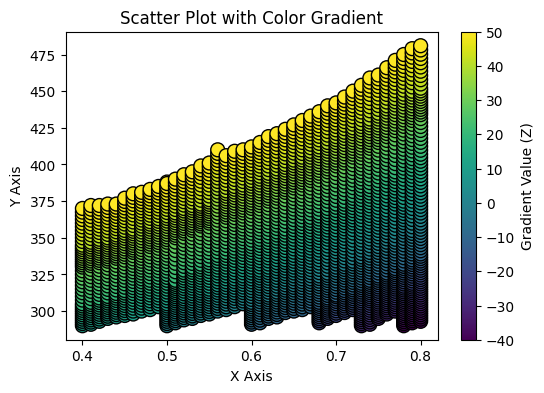

In [3]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(df['X axis'], df['Y Axis'], c=df['Z Axis'], cmap='viridis', s=100, edgecolors='k')

cbar = plt.colorbar(scatter)
cbar.set_label("Gradient Value (Z)")

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scatter Plot with Color Gradient")
plt.savefig("graph_model.png")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

lis = ["X axis","Z Axis"]
x_train,x_test,y_train,y_test = train_test_split(df[lis],df["Y Axis"],test_size=0.33,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"The mean absolute error = {mean_absolute_error(y_test,pred)}")
print(f"The root mean squared error = {ny.sqrt(mean_squared_error(y_test,pred))}")
print(f"The average value of the data = {df['Y Axis'].mean()}")

The mean absolute error = 3.258384929445164
The root mean squared error = 4.165204863300366
The average value of the data = 356.1678082191781


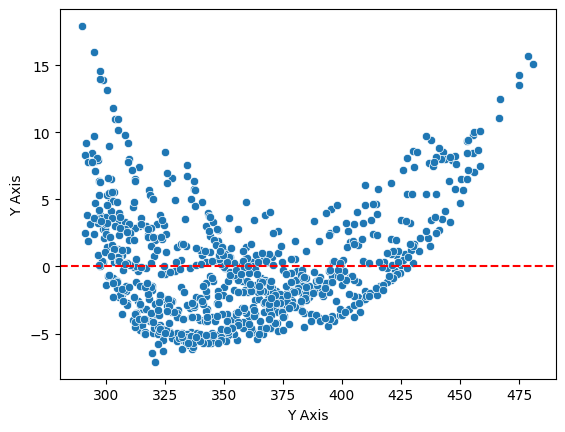

In [8]:
resid = y_test - pred
sns.scatterplot(x=y_test,y=resid)
plt.axhline(y=0,color="r",ls="--")

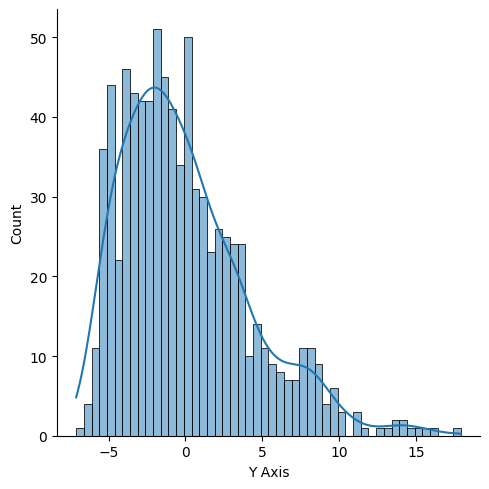

In [9]:
sns.displot(resid,bins=50,kde=True)

In [10]:
# import scipy as sp

In [11]:
# res= ny.asarray(resid,dtype=ny.float64)
# res = res[~ny.isnan(res)]
# fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# _ = sp.stats.probplot(res,plot=ax)
# plt.show()

Linear regression is not an ideal fit for this data set

In [13]:
import json
slope1 = model.coef_[0]  # Coefficient for the first feature
slope2 = model.coef_[1]  # Coefficient for the second feature
intercept = model.intercept_

print(f"Slope 1: {slope1}")
print(f"Slope 2: {slope2}")
print(f"Intercept: {intercept}")


# Export the model parameters to a JSON file
model_data = {
    'slope1': slope1,
    'slope2': slope2,
    'intercept': intercept
}

with open('model.json', 'w') as f:
    json.dump(model_data, f)

print("Model parameters saved to model.json")

Slope 1: 258.26147192384855
Slope 2: 2.096183088813003
Intercept: 154.47823280929236
Model parameters saved to model.json
